In [29]:
import os
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
data.shape

(2000, 9)

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [5]:
# let's create a copy of the data, so that original data is not affected
data=data.copy(deep=True)
# when 'deep=True', any changes to new data does not affect the original dataframe, and vice-versa 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Checking how many people there are with diabetes.

In [7]:
data["Outcome"].value_counts().to_frame()

,Outcome
0,1316
1,684


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

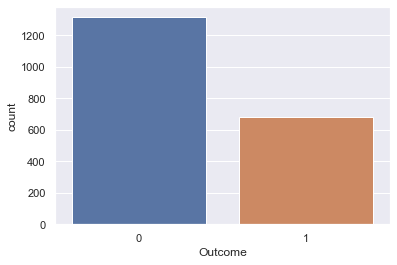

In [9]:
sns.countplot(x='Outcome',data=data)
plt.show()

In [10]:
data.Outcome.unique()

array([1, 0], dtype=int64)

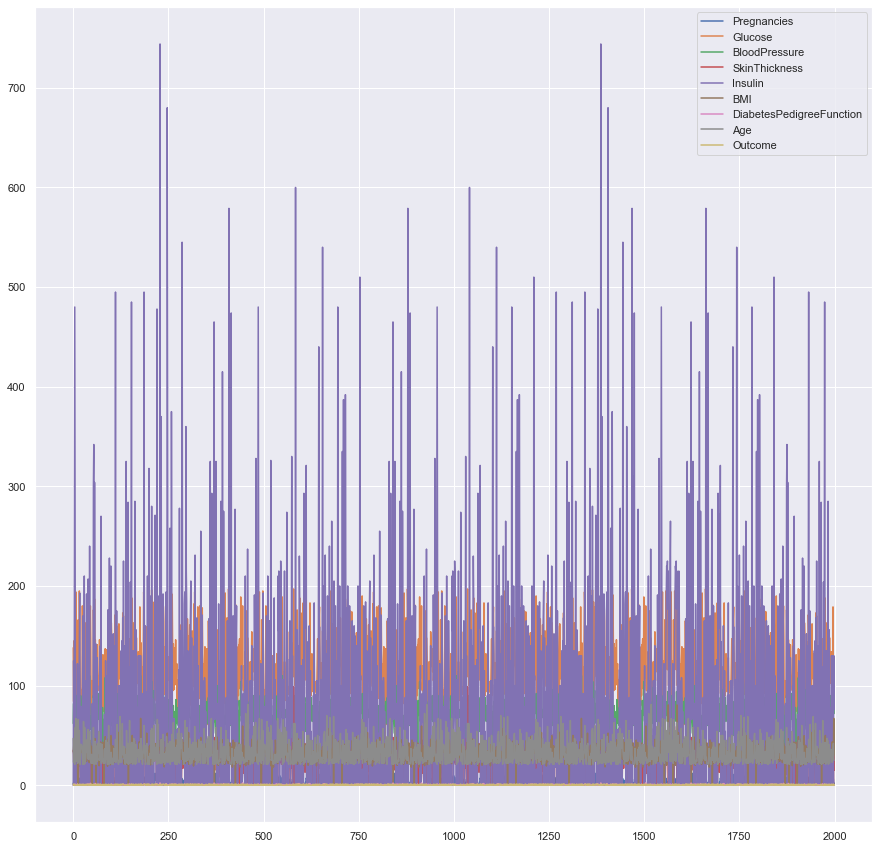

In [11]:
data.plot(figsize=(15,15))

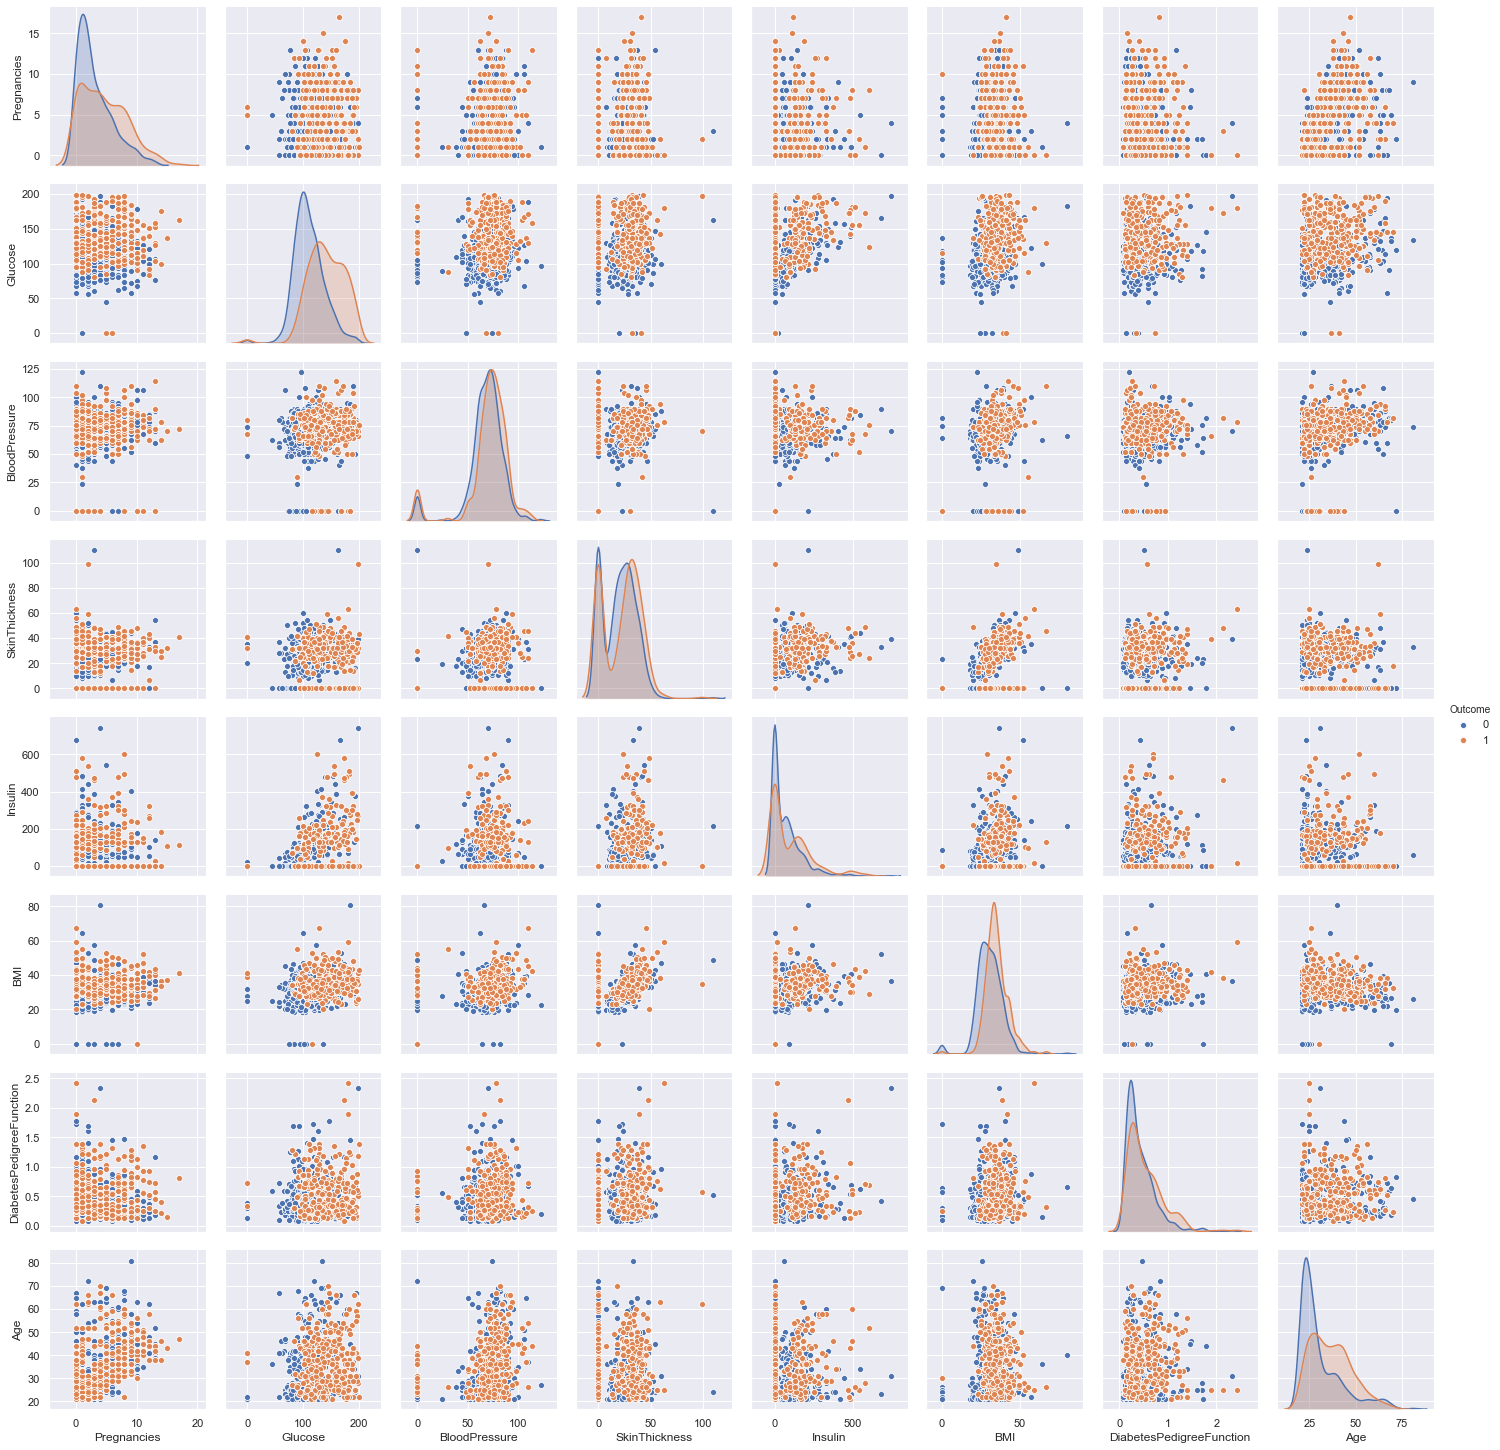

In [12]:
sns.pairplot(data,hue='Outcome')
plt.show()

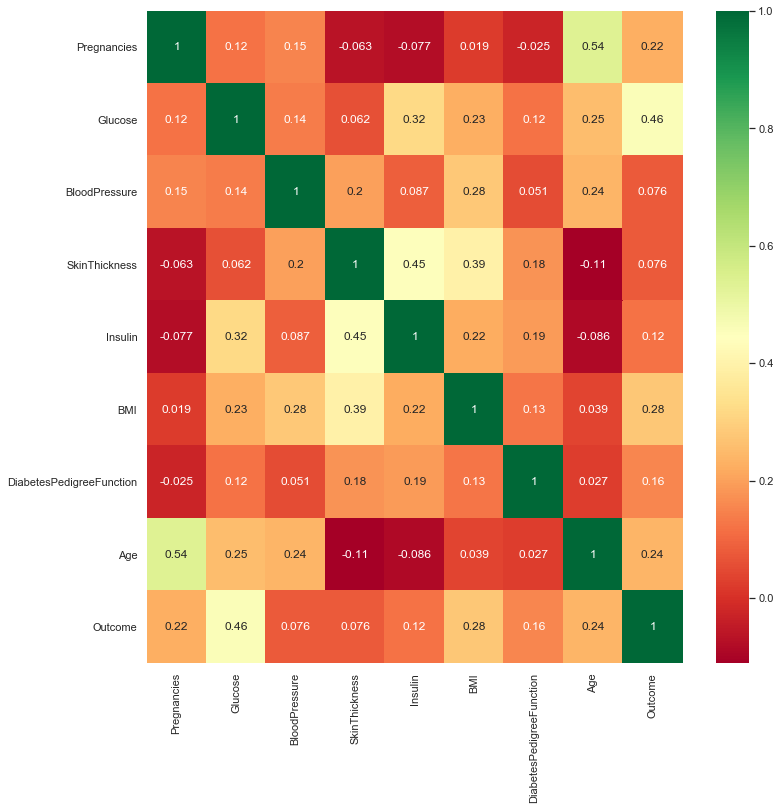

In [15]:
plt.figure(figsize = (12,12))
p = sns.heatmap(data.corr(),annot = True,cmap = 'RdYlGn')

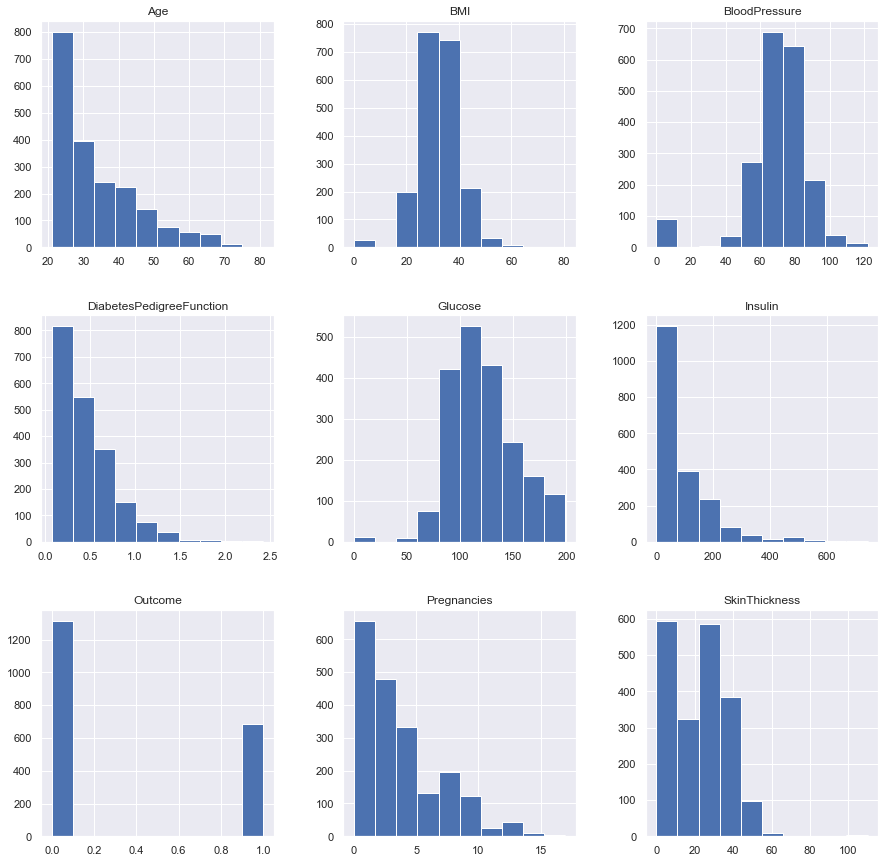

In [16]:
data.hist(figsize= (15,15))
plt.show()

In [17]:
#Skewness - Data between -0.5 and 0.5 then -- symmetrical (no skew)
#Data between -1 and -0.5 then right skewd | if in between 0.5 and 1 then left skewd
#Data less than -1 or greater than 1 considered to be highly skewd
# To check the skewness in each attribute in the data
data.skew(axis = 0)

Pregnancies                 0.982366
Glucose                     0.158806
BloodPressure              -1.854476
SkinThickness               0.207228
Insulin                     1.996084
BMI                        -0.090455
DiabetesPedigreeFunction    1.811979
Age                         1.181267
Outcome                     0.666633
dtype: float64

In [18]:
data.isin([0]).sum()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [19]:
data[data.Pregnancies == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
24,0,180,90,26,90,36.5,0.314,35,1
...,...,...,...,...,...,...,...,...,...
1959,0,129,80,0,0,31.2,0.703,29,0
1966,0,102,75,23,0,0.0,0.572,21,0
1983,0,114,80,34,285,44.2,0.167,27,0
1985,0,131,88,0,0,31.6,0.743,32,1


In [22]:
import numpy as np
data.isin([np.NaN]).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

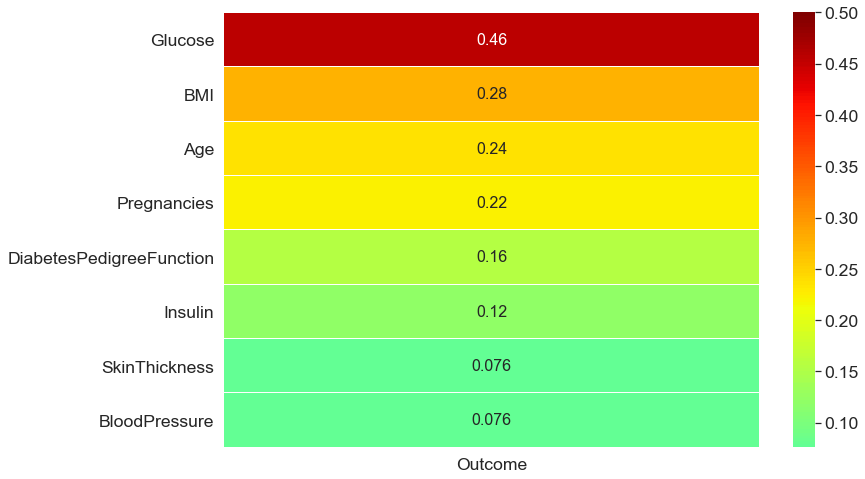

In [23]:
cor = data.corr().iloc[ : , -1].sort_values(ascending=False)[1:].to_frame()
sns.set(font_scale=1.6)
plt.figure(figsize=(12, 8))
sns.heatmap(data= cor, cmap="jet",center=0.1, annot=True, vmax=.5, linewidths=0.1,annot_kws={"size": 16})
plt.show()

In [24]:
# independent variable
X = data.iloc[ : , : -1]

# dependent variable
y = data.Outcome

In [25]:
#The division of values into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

Creating an estimator model and training it.

In [30]:
model = LogisticRegression(max_iter=125)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"The model correctly classifies with {score*100:.2f}% accuracy.")

y_pred = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

The model correctly classifies with 83.00% accuracy.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1
0,245,21
1,47,87


In [31]:
print(f"The model predicts disease with the following accuracy:\n\n\
Healthy people - classified as\n\t\
No disease = {cm[0][0]}/{cm.loc[0].sum()}\n\tDisease = {cm[1][0]}/{cm.loc[0].sum()}\n\n\
\
Sick people - diabetic - classified as\n\t\
No disease = {cm[0][1]}/{cm.loc[1].sum()}\n\tDisease = {cm[1][1]}/{cm.loc[1].sum()}")

The model predicts disease with the following accuracy:

Healthy people - classified as
	No disease = 245/266
	Disease = 21/266

Sick people - diabetic - classified as
	No disease = 47/134
	Disease = 87/134


In [33]:
# Pregnancies: Number of times pregnant
PREGNANCIES = int(data.Pregnancies.mean())

# Plasma glucose concentration over 2 hours in an oral glucose tolerance test 
GLUCOSE = int(data.Glucose.mean())

# Diastolic blood pressure (mm Hg)
BLOODPRESSURE = int(data.BloodPressure.mean())

# Triceps skin fold thickness (mm)
SKINTHICKNESS = int(data.SkinThickness.mean())

# 2-Hour serum insulin (mu U/ml)
INSULIN = int(data.Insulin.mean())

# Body mass index (weight in kg/(height in m)2)
BMI = data.BMI.mean()

# DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
DIABETESPEDIGREEFUNCTION = data.DiabetesPedigreeFunction.mean()

# Age (years)
AGE = int(data.Age.mean())

In [34]:
sample = {
    'Pregnancies': PREGNANCIES, 
    'Glucose': GLUCOSE, 
    'Bloodpressure': BLOODPRESSURE, 
    'Skinthickness': SKINTHICKNESS, 
    'Insulin': INSULIN,
    'Bmi': BMI, 
    'Diabetespedigreefunction': DIABETESPEDIGREEFUNCTION, 
    'Age':AGE,
}

In [35]:
if None in sample.values():
    print("Please do not leave any variable with the 'None' value.")
else:
    trial = pd.DataFrame.from_dict(data=sample, orient='index').T
    print(f"Outcome: {model.predict(trial)[0]} - (0 if non-diabetic, 1 if diabetic)")
    print(f"The probability of no disease {model.predict_proba(trial)[0][0]*100:.2f}%\nThe probability of disease {model.predict_proba(trial)[0][1]*100:.2f}%")

Outcome: 0 - (0 if non-diabetic, 1 if diabetic)
The probability of no disease 72.33%
The probability of disease 27.67%
